# Frecuencia de Palabras

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

In [2]:
# Clase para encontrar palabras comunes en los abstracts
class MostCommonWords:
    def __init__(self, df):
        self.df = df
    
    def find_most_common_words(self, n=1000):
        # Obtener los abstracts como una lista de strings
        abstracts = self.df['Abstract'].tolist()
        
        # Inicializar CountVectorizer
        vectorizer = CountVectorizer()
        
        # Ajustar y transformar los abstracts
        X = vectorizer.fit_transform(abstracts)
        
        # Obtener el vocabulario del CountVectorizer
        vocabulary = vectorizer.get_feature_names_out()
        
        # Obtener las frecuencias de las palabras
        word_frequencies = zip(vocabulary, X.sum(axis=0).tolist()[0])
        
        # Ordenar las palabras por frecuencia
        sorted_words = sorted(word_frequencies, key=lambda x: x[1], reverse=True)
        
        # Obtener las palabras más comunes
        most_common_words = sorted_words[:n]
        
        return most_common_words

In [3]:
# Cargar el DataFrame df_definitivo desde el archivo CSV
df_definitivo = pd.read_csv('AssetPricingModels_dfdef.csv')

# Crear una instancia de la clase MostCommonWords
most_common_analyzer = MostCommonWords(df_definitivo)

In [4]:
# Encontrar las palabras más comunes
most_common_words = most_common_analyzer.find_most_common_words(n=1000)
print("Las 1000 palabras más comunes son:")
for word, frequency in most_common_words:
    print(f"{word}: {frequency}")

# Guardar los resultados en un archivo CSV
df_palabras_comunes = pd.DataFrame(most_common_words, columns=['Palabra', 'Frecuencia'])
df_palabras_comunes.to_csv('AssetPricingModelspalabras_comunes.csv', index=False)

Las 1000 palabras más comunes son:
the: 89650
of: 47464
and: 37831
to: 25390
in: 24888
is: 15360
model: 13404
for: 13314
that: 13069
pricing: 11820
we: 10701
asset: 10368
this: 10109
on: 10094
with: 8774
risk: 8760
are: 8404
market: 8199
by: 7676
as: 7074
an: 5730
models: 5526
returns: 4941
stock: 4406
price: 4322
from: 4126
financial: 4090
be: 4084
paper: 3911
volatility: 3900
which: 3727
based: 3642
capital: 3344
factor: 3328
results: 3276
using: 3223
can: 3194
time: 3193
value: 3085
it: 3052
study: 3014
option: 2971
our: 2902
data: 2808
prices: 2678
return: 2618
have: 2594
markets: 2584
between: 2531
not: 2427
assets: 2417
options: 2414
portfolio: 2365
also: 2328
all: 2285
these: 2241
has: 2224
or: 2185
capm: 2174
equity: 2144
factors: 2141
method: 2131
two: 2090
more: 2055
show: 2027
approach: 1974
investment: 1952
their: 1927
analysis: 1890
rate: 1886
used: 1862
when: 1833
investors: 1827
information: 1822
such: 1812
empirical: 1811
under: 1808
stochastic: 1759
performance: 1723
a

In [5]:
# Cargar el archivo CSV con las palabras comunes
archivo_palabras_comunes = 'AssetPricingModelspalabras_comunes.csv'
df_palabras_comunes = pd.read_csv(archivo_palabras_comunes)

# Obtener las 60 primeras palabras más comunes y sus frecuencias
palabras_mas_comunes = df_palabras_comunes['Palabra'].head(60)
frecuencias = df_palabras_comunes['Frecuencia'].head(60)

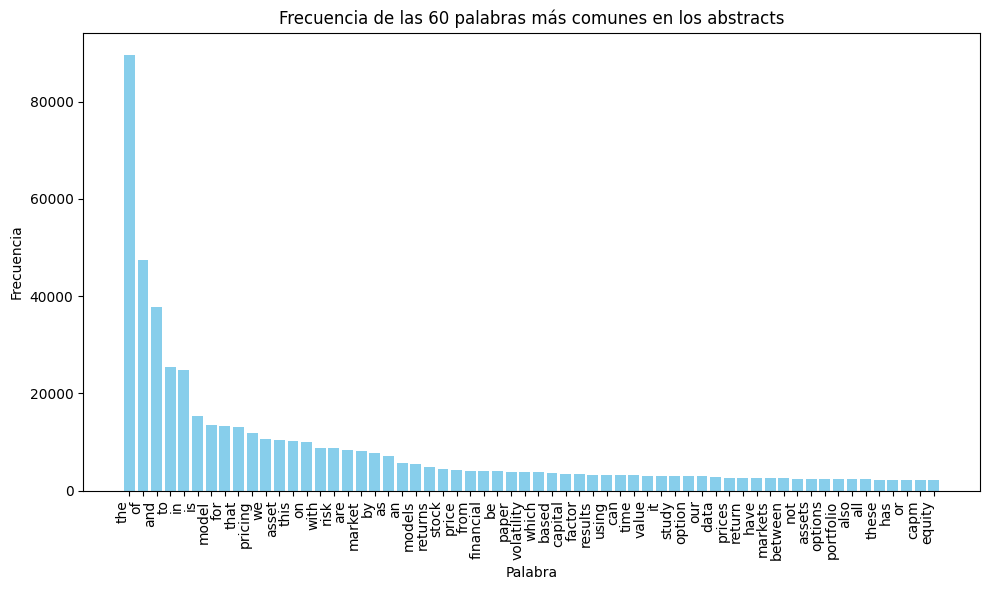

In [6]:
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(palabras_mas_comunes, frecuencias, color='skyblue')

# Añadir título y etiquetas
plt.title('Frecuencia de las 60 palabras más comunes en los abstracts')
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90, ha='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()